In [51]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

In [52]:
red_fighter = 'Alexander Volkanovski'
blue_fighter = 'Islam Makhachev'
print(red_fighter + ' vs ' + blue_fighter)

Alexander Volkanovski vs Islam Makhachev


In [53]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.date =  pd.to_datetime(df.date)
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.007043,-0.13660,1.572182,0.000126,0.146611,-0.234918,0.536244,-0.191655,0.609627,0.331825,0.489153,-1.247508,-0.017271,2.039564,0.562079,-2.148820
6729,lose,Eric Shelton,Jarred Brooks,2017-07-29,Flyweight,S-DEC:,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820


In [54]:
X = df.columns[df.columns.get_loc('kd_dif'):df.columns.get_loc('lose_strk_dif')+1]
y = ['result']
print('X = %s'  %X)
print('y = %s' %y)

X = Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif',
       'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif',
       'str. def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif',
       'lose_strk_dif'],
      dtype='object')
y = ['result']


### blue_fighter model:

In [55]:
blue_data = get_fighter_data(fighter=blue_fighter, data=df)
blue_data.head(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,lose,Charles Oliveira,Islam Makhachev,2022-10-22,Lightweight,SUB:Arm Triangle,-1.347450,-0.400099,-0.796295,-0.847207,-0.589287,-0.864405,-1.105531,1.429102,0.717175,-0.478976,1.368283,-1.247508,-1.776060,-0.515585,0.562079,0.005762
1,win,Islam Makhachev,Bobby Green,2022-02-26,Catch Weight,KO/TKO:Punches,0.007043,0.202183,0.387943,0.000126,1.155684,0.954112,0.536244,0.952409,-2.205597,0.575065,-1.653724,0.350618,1.488122,0.813092,3.994208,0.005762
2,win,Islam Makhachev,Dan Hooker,2021-10-30,Lightweight,SUB:Kimura,0.007043,-0.061315,0.387943,1.694792,1.406559,1.024055,0.335210,1.047748,-1.591942,0.980465,-2.361912,1.275849,1.554775,0.634232,3.994208,0.005762


In [56]:
blue_data = set_train_test(X_columns=X, y_columns=y, data=blue_data, test_size=0.4, valid_size=0)

Data split: Data=(13, 23), train_set=(9, 16), validation_set=(0, 16), test_set=(4, 16)


In [57]:
knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=blue_data, neighbors=2)
blue_data = set_predictions(model=knn_clf, data=blue_data, X_columns=X, y_columns=y)
blue_data.tail(3)

,set,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result_pred
10,train,lose,Chris Wade,Islam Makhachev,2016-09-17,Lightweight,U-DEC:,0.007043,-0.249528,-1.585788,0.000126,-0.461063,-0.479719,-1.105531,-0.191655,-0.408915,-0.478976,0.483048,-1.247508,-1.776060,0.761989,-0.009943,0.005762,lose
11,train,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,lose
12,train,win,Islam Makhachev,Leo Kuntz,2015-05-23,Lightweight,SUB:Rear Naked Choke,0.007043,0.955035,1.177436,0.847459,0.793310,1.408741,1.842963,0.571055,0.451469,2.196666,-1.745300,1.780521,1.488122,-0.004555,-0.009943,0.005762,win


Accuracy = 1.000000


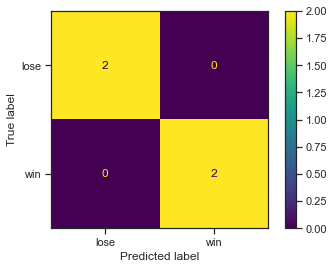

In [58]:
get_model_evaluation(data=blue_data)

### red_fighter model:

In [59]:
red_data = get_fighter_data(fighter=red_fighter, data=df)
red_data.head(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,lose,Max Holloway,Alexander Volkanovski,2022-07-02,Featherweight,U-DEC:,0.007043,-2.696297,-0.006803,0.000126,-0.795562,0.604397,0.368716,0.094361,0.299636,-0.803296,0.824932,-0.069941,-0.017271,-0.617791,-5.158138,0.005762
1,win,Alexander Volkanovski,Chan Sung Jung,2022-04-09,Featherweight,KO/TKO:Punches,1.361536,3.401803,1.572182,0.000126,0.536861,-0.374804,0.033660,-0.477671,1.798981,1.223706,-0.505972,0.687066,-0.017271,0.761989,5.138252,0.005762
2,win,Alexander Volkanovski,Brian Ortega,2021-09-25,Featherweight,U-DEC:,0.007043,4.756936,-0.796295,-2.541873,0.419786,0.464511,0.569750,-0.954364,1.659801,1.548026,-1.916242,0.939402,0.076432,0.302063,4.566230,0.005762


In [60]:
red_data = set_train_test(X_columns=X, y_columns=y, data=red_data, test_size=0.4, valid_size=0)

Data split: Data=(12, 23), train_set=(5, 16), validation_set=(0, 16), test_set=(7, 16)


In [61]:
knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=red_data, neighbors=2)
red_data = set_predictions(model=knn_clf, data=red_data, X_columns=X, y_columns=y)
red_data.tail(3)

,set,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result_pred
9,test,lose,Shane Young,Alexander Volkanovski,2017-11-18,Catch Weight,U-DEC:,0.007043,-1.868160,-1.585788,0.000126,-0.511238,-0.444747,-0.569441,-0.191655,-0.978286,-1.370857,0.898193,-0.406389,-0.017271,-2.559705,-1.153986,0.005762,lose
10,test,lose,Mizuto Hirota,Alexander Volkanovski,2017-06-10,Featherweight,U-DEC:,-1.347450,-1.529376,-1.585788,0.000126,-0.199038,0.499483,-0.502430,-0.096316,-2.154987,-1.370857,-0.023672,-0.490501,-0.017271,-1.716505,-0.009943,0.005762,lose
11,train,lose,Yusuke Kasuya,Alexander Volkanovski,2016-11-26,Lightweight,KO/TKO:Punches,0.007043,-1.717589,-0.796295,0.000126,-0.199038,-0.095032,-2.445755,-0.191655,-2.907822,-1.046536,0.489153,-0.995172,1.488122,-0.004555,-0.009943,1.083053,lose


Accuracy = 1.000000


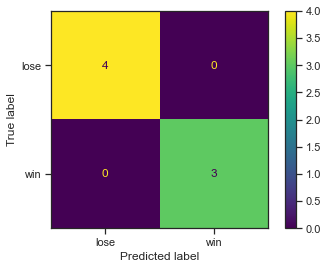

In [62]:
get_model_evaluation(data=red_data)